In [24]:
# Define Function
import matplotlib.pyplot as plt

def plot_scatter(y_pred, y_test, title):
    x = y_test
    plt.plot(x, y_test, color='darkgray')
    plt.scatter(x, y_pred, color='steelblue', alpha=0.5)
    plt.show()

In [15]:
# Load Data
import pandas as pd

file_path = 'test_1712751205.csv'
data = pd.read_csv(file_path)

data.head()

,FORMULA,PROPERTY: Microstructure,Processing method,PROPERTY: BCC/FCC/other,PROPERTY: Exp. Density (g/cm$^3$),PROPERTY: Calculated Density (g/cm$^3$),PROPERTY: HV,PROPERTY: Type of test,PROPERTY: Test temperature ($^\circ$C),PROPERTY: YS (MPa),PROPERTY: UTS (MPa),PROPERTY: Elongation (%),PROPERTY: Elongation plastic (%),PROPERTY: Exp. Young modulus (GPa),PROPERTY: Calculated Young modulus (GPa),REFERENCE: doi,PROPERTY: S.S. (MPa/(g/cm^3),PROPERTY: Details,REFERENCE: year,REFERENCE: Data Source
0,Al0.7CoCrFe2Ni,Other,OTHER,other,NaN,7.20422,NaN,23.0,23.0,1166.0,1945.0,30.2,NaN,NaN,197.05256,NaN,NaN,NaN,NaN,Paper_Collection_5_element
1,AlCoCrCuFeNi,FCC+BCC,NaN,other,-7.1,7.07083,NaN,NaN,25.0,1303.0,NaN,24.0,NaN,-183.0,175.64310,NaN,NaN,FCC + BCC,NaN,Data in Brief-2018-V21
2,Al10Co25Cr8Fe15Ni36Ti6,FCC+Sec.,OTHER,other,NaN,7.37269,NaN,700.0,700.0,486.0,624.0,11.0,NaN,NaN,184.80561,NaN,NaN,FCC + 帠' + B9,NaN,Paper_Collection_6_element
3,AlCoCrFeNiSi0.6,BCC,NaN,BCC,-6.0,6.00903,NaN,NaN,25.0,1834.0,2195.0,3.0,NaN,-178.0,162.11358,NaN,NaN,BCC,NaN,Data in Brief-2018-V21
4,AlCoCrCuFeNi,FCC+BCC,NaN,other,7.4,7.07083,NaN,NaN,800.0,172.0,NaN,NaN,NaN,NaN,175.64310,NaN,NaN,FCC + BCC,NaN,Data in Brief-2018-V21-Temp


In [16]:
# Preprocess the Data
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# check missing values
print(data.isnull().sum())
print(data.info())

FORMULA                                        1
PROPERTY: Microstructure                      79
Processing method                            377
PROPERTY: BCC/FCC/other                        1
PROPERTY: Exp. Density (g/cm$^3$)           1151
PROPERTY: Calculated Density (g/cm$^3$)        1
PROPERTY: HV                                 990
PROPERTY: Type of test                      1465
PROPERTY: Test temperature ($^\circ$C)       387
PROPERTY: YS (MPa)                           658
PROPERTY: UTS (MPa)                         1152
PROPERTY: Elongation (%)                     936
PROPERTY: Elongation plastic (%)            1427
PROPERTY: Exp. Young modulus (GPa)          1371
PROPERTY: Calculated Young modulus (GPa)     417
REFERENCE: doi                               797
PROPERTY: S.S. (MPa/(g/cm^3)                1456
PROPERTY: Details                            876
REFERENCE: year                              672
REFERENCE: Data Source                       787
dtype: int64
<class 

In [17]:
# drop rows with missing values
cols_to_check = ['PROPERTY: Calculated Density (g/cm$^3$)',
                 'PROPERTY: YS (MPa)',
                 'PROPERTY: Calculated Young modulus (GPa)',
                 'PROPERTY: Elongation (%)']
                # this 5 columns has less missing value

data = data.dropna(subset=cols_to_check)
print(data.isnull().sum())
print(data.info())

FORMULA                                       0
PROPERTY: Microstructure                      0
Processing method                           156
PROPERTY: BCC/FCC/other                       0
PROPERTY: Exp. Density (g/cm$^3$)           228
PROPERTY: Calculated Density (g/cm$^3$)       0
PROPERTY: HV                                335
PROPERTY: Type of test                      365
PROPERTY: Test temperature ($^\circ$C)        0
PROPERTY: YS (MPa)                            0
PROPERTY: UTS (MPa)                         235
PROPERTY: Elongation (%)                      0
PROPERTY: Elongation plastic (%)            371
PROPERTY: Exp. Young modulus (GPa)          378
PROPERTY: Calculated Young modulus (GPa)      0
REFERENCE: doi                              313
PROPERTY: S.S. (MPa/(g/cm^3)                343
PROPERTY: Details                           191
REFERENCE: year                             204
REFERENCE: Data Source                      139
dtype: int64
<class 'pandas.core.frame.D

In [20]:
# seperate features and targets 
# predict elongation
x = data[['PROPERTY: Calculated Density (g/cm$^3$)',
          'PROPERTY: YS (MPa)',
          'PROPERTY: Calculated Young modulus (GPa)']]
y = data['PROPERTY: Elongation (%)']

# split the data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=10)

# normalize the data
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

print(x.isnull().sum())
print(y.isnull().sum())

PROPERTY: Calculated Density (g/cm$^3$)     0
PROPERTY: YS (MPa)                          0
PROPERTY: Calculated Young modulus (GPa)    0
dtype: int64
0


Epoch 1/200


C:\Users\jacky\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


15/15 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - accuracy: 0.0125 - loss: 1105.9946 - val_accuracy: 0.0137 - val_loss: 1004.7866
Epoch 2/200
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.0185 - loss: 809.1361 - val_accuracy: 0.0137 - val_loss: 445.9246
Epoch 3/200
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.0091 - loss: 386.4788 - val_accuracy: 0.0137 - val_loss: 314.5023
Epoch 4/200
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.0172 - loss: 296.1027 - val_accuracy: 0.0137 - val_loss: 342.3742
Epoch 5/200
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.0169 - loss: 250.7023 - val_accuracy: 0.0137 - val_loss: 263.3010
Epoch 6/200
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.0129 - loss: 208.9482 - val_accuracy: 0.0137 - val_loss: 255.2528
Epoch 7/200
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.0107 - loss: 240.2631 - val_accuracy: 0.0137 - val_loss: 260.3466
Epoch 8/200
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.0144 - loss: 229.4299 - val

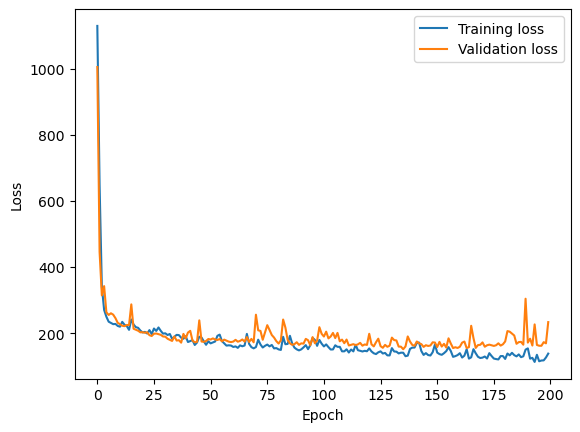

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


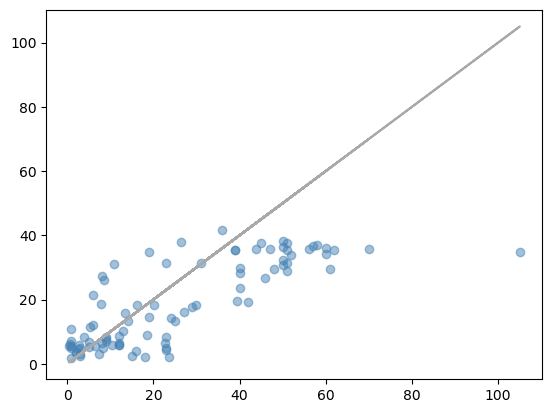

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.0587 - loss: 239.9651 
Accuracy:0.05494505539536476


In [39]:
# Define the Model
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.callbacks import EarlyStopping
from keras.optimizers import Adam

model = Sequential([Dense(6, input_dim=3, activation='relu'),
                    Dense(12, activation='relu'),
                    Dense(24, activation='relu'),
                    Dense(48, activation='relu'),
                    Dense(96, activation='relu'),
                    Dense(48, activation='relu'),
                    Dense(24, activation='relu'),
                    Dense(12, activation='relu'),
                    Dense(6, activation='relu'),
                    Dense(3, activation='relu'),
                    Dense(1, activation='relu')])

model.compile(optimizer=Adam(learning_rate=0.005),
              loss='mse', metrics=['accuracy'])

# Train the Model
early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

history = model.fit(x_train, y_train, validation_split=0.2, epochs=200, batch_size=20)

# Model Evaluation
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Prediction
y_pred = model.predict(x_test)
plot_scatter(y_pred, y_test, 'Testing Set')
result = model.evaluate(x_test, y_test)
print('Accuracy:'+ str(result[1]))